In [1]:
import pandas as pd
import numpy as np

In [44]:
df = pd.read_csv('smsspamcollection.tsv', sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [6]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

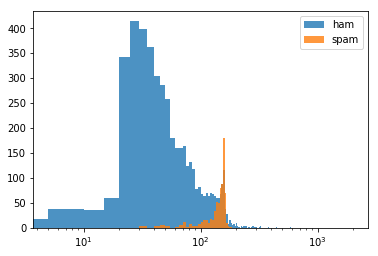

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 5*(np.arange(0,400))
plt.hist(df[df['label'] == 'ham']['length'], bins=bins,alpha=0.8)
plt.hist(df[df['label'] == 'spam']['length'], bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

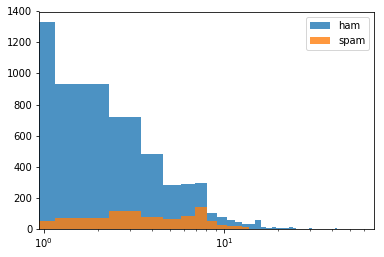

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15*(np.arange(0,50))
plt.hist(df[df['label'] == 'ham']['punct'], bins=bins,alpha=0.8)
plt.hist(df[df['label'] == 'spam']['punct'], bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df[['length','punct']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
X_train.shape

(3900, 2)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr_model = LogisticRegression(solver='lbfgs')

In [14]:
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
from sklearn import metrics

In [16]:
predictions = lr_model.predict(X_test)

In [17]:
y_test

3245     ham
944      ham
1044     ham
2484     ham
812      ham
2973     ham
2991     ham
2942     ham
230      ham
1181     ham
1912     ham
1992     ham
5435     ham
4805     ham
401     spam
1859     ham
1344     ham
2952     ham
501      ham
3337     ham
1945     ham
3142     ham
2422     ham
381      ham
5567    spam
4937     ham
79       ham
5240     ham
2554     ham
5345     ham
        ... 
1170     ham
1391     ham
4337     ham
220      ham
1662     ham
627      ham
3545     ham
2809     ham
83       ham
3102     ham
790      ham
2476     ham
461      ham
4907     ham
551      ham
3375     ham
4020    spam
3516     ham
198      ham
3193     ham
2857     ham
402      ham
3782     ham
4456     ham
5308     ham
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: label, Length: 1672, dtype: object

In [18]:
print(metrics.confusion_matrix(y_test, predictions))

[[1404   44]
 [ 219    5]]


In [19]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [20]:
metrics.accuracy_score(y_test, predictions)

0.8427033492822966

In [21]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train,y_train)
predictions = nb_model.predict(X_test)

In [22]:
metrics.confusion_matrix(y_test, predictions)

array([[1438,   10],
       [ 224,    0]], dtype=int64)

In [23]:
metrics.accuracy_score(y_test, predictions)

0.8600478468899522

In [24]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [25]:
from sklearn.svm import SVC

In [26]:
svc_model = SVC()

In [27]:
svc_model.fit(X_train,y_train)

C:\Users\prith\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [28]:
predictions = svc_model.predict(X_test)

In [29]:
metrics.confusion_matrix(y_test, predictions)

array([[1373,   75],
       [ 121,  103]], dtype=int64)

In [30]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

    accuracy                           0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672



In [31]:
metrics.accuracy_score(y_test, predictions)

0.8827751196172249

In [49]:
X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [51]:
txt_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', LinearSVC()),])

In [52]:
txt_clf.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [53]:
preds = txt_clf.predict(X_test)

In [54]:
metrics.confusion_matrix(y_test, preds)

array([[1445,    3],
       [  10,  214]], dtype=int64)

In [55]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      1448
        spam       0.99      0.96      0.97       224

    accuracy                           0.99      1672
   macro avg       0.99      0.98      0.98      1672
weighted avg       0.99      0.99      0.99      1672



In [56]:
print(metrics.accuracy_score(y_test, preds))

0.9922248803827751
